In [17]:
import pathlib
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

batch_size = 20
img_height = 250
img_width = 250

data_dir = "/home/pei/Documents/yi_liu/graph2vec/CNN/data_process"
data_dir = pathlib.Path(data_dir)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4099 files belonging to 3 classes.
Using 3280 files for training.
Found 4099 files belonging to 3 classes.
Using 819 files for validation.


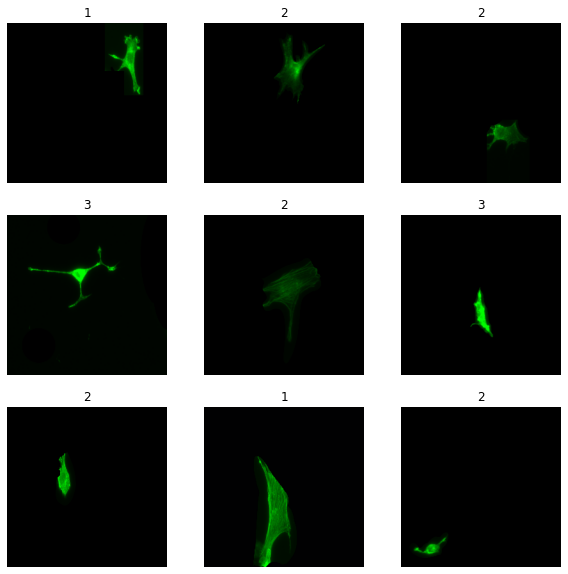

In [2]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [3]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(20, 250, 250, 3)
(20,)


In [4]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [5]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9960785


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



In [15]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [16]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
164/164 [==============================] - 4s 20ms/step - loss: 0.9034 - accuracy: 0.5854 - val_loss: 0.8036 - val_accuracy: 0.6422
Epoch 2/10
164/164 [==============================] - 3s 20ms/step - loss: 0.7054 - accuracy: 0.7079 - val_loss: 0.7713 - val_accuracy: 0.6484
Epoch 3/10
164/164 [==============================] - 3s 20ms/step - loss: 0.5928 - accuracy: 0.7622 - val_loss: 0.8474 - val_accuracy: 0.6337
Epoch 4/10
164/164 [==============================] - 3s 19ms/step - loss: 0.4830 - accuracy: 0.8113 - val_loss: 0.8958 - val_accuracy: 0.6252
Epoch 5/10
164/164 [==============================] - 3s 19ms/step - loss: 0.4174 - accuracy: 0.8372 - val_loss: 1.0830 - val_accuracy: 0.6313
Epoch 6/10
164/164 [==============================] - 3s 19ms/step - loss: 0.3863 - accuracy: 0.8582 - val_loss: 1.1624 - val_accuracy: 0.5849
Epoch 7/10
164/164 [==============================] - 3s 20ms/step - loss: 0.2899 - accuracy: 0.8896 - val_loss: 1.2524 - val_accuracy: 0.6007